## Changelog

#### 17/01/25

- Found the dataset that I want to use from this link (https://www.geeksforgeeks.org/dataset-for-sentiment-analysis/#1-imdb-reviews-dataset)
- This is a sentiment analysis dataset taken from IMDB movie reviews and it is used to find out whether or not a review is positive or negative based on the words used in the reviews
- It has 50,000 rows, this isn't the biggest dataset but it is a good starting point whilst getting used to the new model and I want to see how accurate I can get it at predicting sentiments
- A multinomial Bayesian Classifier seems to be the best fit for this dataset as this will have a high number of features which multinomial bayesian classifiers are good at handling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv('IMDB-Dataset.csv')
print(ds.head())
# This isjust importing the data and printing the first 5 rows of the data to ensure that the data is imported correctly

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
categories = ['Positive', 'Negative']

from sklearn.model_selection import train_test_split

X = ds['review']
y = ds['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [5]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

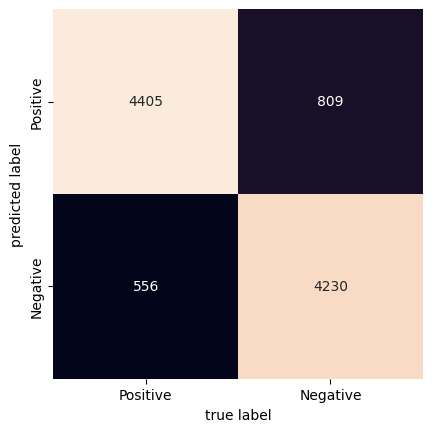

In [6]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
example_reviews = ["This movie was an interesting one! Overall it was good however there were some issues, i did enjoy it"]

result = model.predict(example_reviews)
print(result)

['positive']


In [ ]:
# classification scores
 
from sklearn.metrics import classification_report

classification_report(y_test, labels, target_names=['Positive', 'Negative'])

print(classification_report(y_test, labels, target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.84      0.89      0.87      4961
    Negative       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

